# Data Visualization And Preprocessing

### Imports 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from geopy.geocoders import Nominatim

In [2]:
Pune_df = pd.read_csv("/content/Pune_df.csv")

Pune_df.head()

,Neighborhood,Latitude,Longitude
0,Appa Balwant Chowk,18.516484,73.85387
1,"Aundh, Pune",18.563450,73.81227
2,Balewadi,18.576020,73.77983
3,Baner,18.548200,73.77316
4,Bavdhan,18.507470,73.78236


In [3]:
venues_df = pd.read_csv("/content/venues_df.csv")

venues_df.head()

,Unnamed: 0,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,0,Appa Balwant Chowk,18.516484,73.85387,Sujata Mastani,18.511793,73.852145,Ice Cream Shop
1,1,Appa Balwant Chowk,18.516484,73.85387,Lal Mahal,18.518720,73.856556,Historic Site
2,2,Appa Balwant Chowk,18.516484,73.85387,Bhagat Tarachand,18.514332,73.851317,Indian Restaurant
3,3,Appa Balwant Chowk,18.516484,73.85387,Raja Dinkar Kelkar museum,18.510744,73.854389,History Museum
4,4,Appa Balwant Chowk,18.516484,73.85387,Hotel Madhuban,18.519248,73.848688,Tea Room


## Visualize the nebourhoods in Pune 

In [4]:

address = 'Pune, Maharashtra'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pune, Maharashtra are  {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pune, Maharashtra are  18.521428, 73.8544541.


In [5]:

# create map of Pune using latitude and longitude values
map_Pune = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(Pune_df['Latitude'], Pune_df['Longitude'], Pune_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_Pune)  
    
map_Pune

In [6]:
# save the map as HTML file
map_Pune.save('map_Pune.html')

## Visualize the nebourhood cluster based on Supermarkets 

In [7]:

# one hot encoding
Pune_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Pune_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Pune_onehot.columns[-1]] + list(Pune_onehot.columns[:-1])
Pune_onehot = Pune_onehot[fixed_columns]

print(Pune_onehot.shape)
Pune_onehot.head()


(4313, 143)


,Neighborhoods,Airport Service,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,...,Park,Parsi Restaurant,Pizza Place,Platform,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Whisky Bar,Yoga Studio,Zoo
0,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Appa Balwant Chowk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Pune_grouped = Pune_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(Pune_grouped.shape)
Pune_grouped['Total'] = Pune_grouped.sum(axis=1)


(55, 143)


In [9]:
Pune_grouped.head()

,Neighborhoods,Airport Service,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,...,Parsi Restaurant,Pizza Place,Platform,Plaza,Pool,Pub,Punjabi Restaurant,Racetrack,Resort,Restaurant,Road,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Tea Room,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Track Stadium,Trail,Train Station,Vegetarian / Vegan Restaurant,Watch Shop,Whisky Bar,Yoga Studio,Zoo,Total
0,Appa Balwant Chowk,0.0,0.000000,0.0,0.000000,0.0,0.010000,0.020000,0.030000,0.0,0.0,0.0,0.02000,0.00,0.0,0.0,0.000000,0.00000,0.02,0.00,0.0,0.050000,0.0,0.0,0.0,0.020000,0.00,0.00,0.00,0.020000,0.0,0.0,0.01,0.000000,0.020000,0.0,0.000000,0.02,0.0,0.0,...,0.0,0.010000,0.0,0.01,0.000000,0.0,0.000000,0.0,0.0,0.02,0.00,0.0,0.020000,0.060000,0.01,0.01,0.050000,0.0,0.0200,0.0,0.01,0.01,0.01,0.0,0.01,0.01,0.01,0.00,0.01,0.01,0.0,0.0,0.01,0.00,0.070000,0.0,0.00,0.0,0.0,1.0
1,"Aundh, Pune",0.0,0.000000,0.0,0.010000,0.0,0.010000,0.040000,0.000000,0.0,0.0,0.0,0.01000,0.01,0.0,0.0,0.010000,0.01000,0.00,0.02,0.0,0.050000,0.0,0.0,0.0,0.030000,0.01,0.01,0.01,0.020000,0.0,0.0,0.00,0.000000,0.050000,0.0,0.000000,0.01,0.0,0.0,...,0.0,0.010000,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.05,0.01,0.0,0.000000,0.000000,0.01,0.00,0.040000,0.0,0.0300,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0,0.00,0.02,0.010000,0.0,0.01,0.0,0.0,1.0
2,Balewadi,0.0,0.020000,0.0,0.010000,0.0,0.000000,0.000000,0.010000,0.0,0.0,0.0,0.01000,0.00,0.0,0.0,0.020000,0.01000,0.00,0.01,0.0,0.060000,0.0,0.0,0.0,0.030000,0.00,0.00,0.00,0.010000,0.0,0.0,0.00,0.010000,0.030000,0.0,0.010000,0.00,0.0,0.0,...,0.0,0.040000,0.0,0.00,0.000000,0.0,0.010000,0.0,0.0,0.00,0.02,0.0,0.040000,0.000000,0.01,0.00,0.030000,0.0,0.0600,0.0,0.00,0.01,0.02,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.0,1.0
3,Baner,0.0,0.000000,0.0,0.015625,0.0,0.015625,0.015625,0.015625,0.0,0.0,0.0,0.03125,0.00,0.0,0.0,0.031250,0.03125,0.00,0.00,0.0,0.078125,0.0,0.0,0.0,0.015625,0.00,0.00,0.00,0.031250,0.0,0.0,0.00,0.015625,0.015625,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.015625,0.0,0.00,0.000000,0.0,0.015625,0.0,0.0,0.00,0.00,0.0,0.015625,0.015625,0.00,0.00,0.015625,0.0,0.0625,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.015625,0.0,0.00,0.0,0.0,1.0
4,Bavdhan,0.0,0.022222,0.0,0.044444,0.0,0.000000,0.066667,0.000000,0.0,0.0,0.0,0.00000,0.00,0.0,0.0,0.022222,0.00000,0.00,0.00,0.0,0.177778,0.0,0.0,0.0,0.022222,0.00,0.00,0.00,0.044444,0.0,0.0,0.00,0.000000,0.044444,0.0,0.022222,0.00,0.0,0.0,...,0.0,0.044444,0.0,0.00,0.022222,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.044444,0.022222,0.00,0.00,0.022222,0.0,0.0000,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,0.00,0.0,0.0,1.0


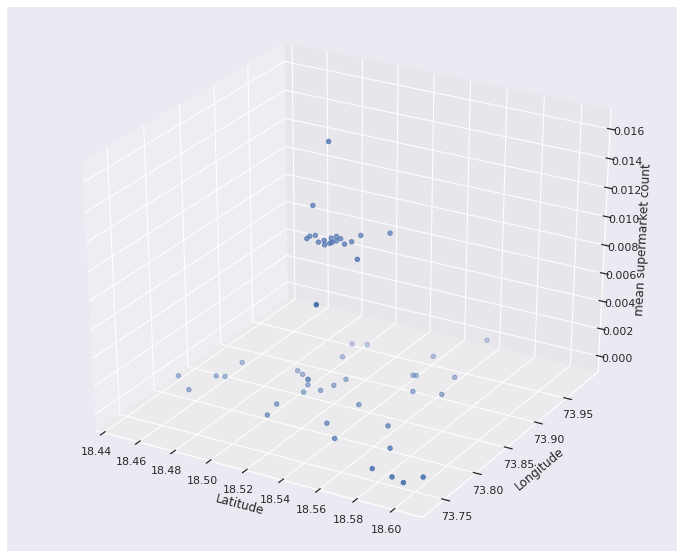

In [10]:
import matplotlib.pyplot as plt

sns.set()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

 
ax.scatter( Pune_df['Latitude'],Pune_df['Longitude'],Pune_grouped['Supermarket'] )

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('mean supermarket count')


plt.show()

In [11]:
Pune_Supermarket = Pune_grouped[["Neighborhoods","Supermarket"]]   
Pune_Supermarket.tail(10)

,Neighborhoods,Supermarket
45,"Somwar Peth, Pune",0.01
46,Sopan Baug,0.00
47,"Sus, Pune",0.00
48,Swargate,0.01
49,Template:Neighbourhoods of Pune,0.00
50,Vadgaon Budruk,0.00
51,Vimannagar,0.00
52,Vishrantwadi,0.00
53,Wakad,0.00
54,Yerawada,0.00


In [12]:
Pune_Supermarket.to_csv("Pune_Supermarket.csv")